# 데이터 가져오기

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [38]:
data=pd.read_csv('C:/Users/Han/Desktop/Statistics/Python/Dataset/student-mat.csv')

In [39]:
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [40]:
data['G_avg']= round((data['G1']+data['G2']+data['G3'])/3, 2)
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3  G_avg  
0        3     4     1     1       3        6   5   6   6   5.67  
1        3     3     1     1       3        4   5   5   6   5.33  
2        3     2     2     3       3       10   7   8  10   8.33  
3        2     2     1     1       5        2  15  14  15  14.67  
4        3     2     1     2       5        4   6  10  10   8.67  

[5 rows x 34 columns]

# 데이터 살펴보기

In [41]:
#g1,g2,g3 점수들의 분포

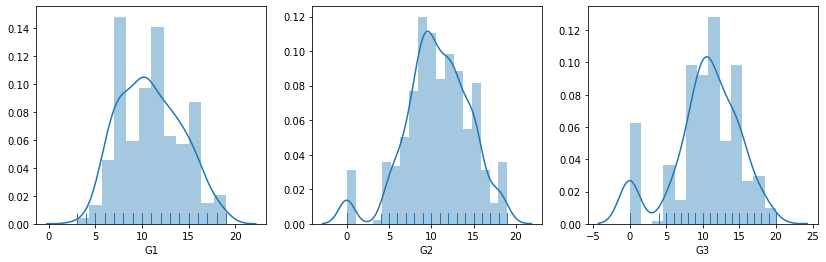

In [42]:
fig, ax = plt.subplots(figsize=(14,4),ncols=3,nrows=1)
for i in range(1,4):
    sns.distplot(data['G'+str(i)],kde=True, rug=True,ax=ax[(i-1)]) # seaborn 에서의 subplot 은 이렇게 ax 를 지정해주어야한다

음... G2,G3 때 포기한사람이 점점 많아지는듯. 재수강하려고그러나

In [43]:
# 연령별 남녀는 얼마나되는지 볼까?

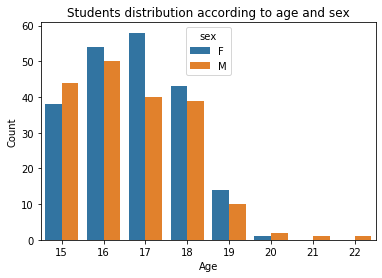

In [44]:
ax = sns.countplot('age',hue='sex', data=data)
plt.title('Students distribution according to age and sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [45]:
# 남녀별 점수차이를 비교해보자

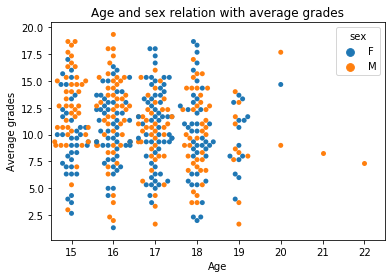

In [46]:
ax = sns.swarmplot(x='age', y='G_avg',hue='sex', data=data)
ax.set_title('Age and sex relation with average grades')
ax.set_xlabel('Age')
ax.set_ylabel('Average grades')
plt.show()

나이가 먹을수록 여자가 강세를보인다.

In [47]:
# 아빠,엄마의 education 수준에 따른 성적은?

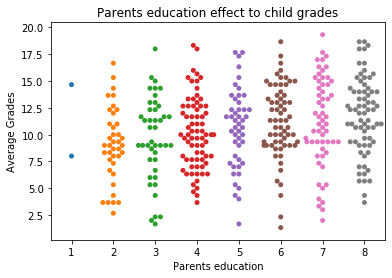

In [48]:
Pedu = data['Fedu'] + data['Medu'] 
ax = sns.swarmplot(x=Pedu,y=data['G_avg'])
ax.set_title('Parents education effect to child grades')
ax.set_xlabel('Parents education')
ax.set_ylabel('Average Grades')
plt.show()

역시.. 부모의 교육수준이 영향을 미치는건 부정할수없는 사실

In [49]:
# 나머지 더 보고싶다면 practice file 에서 [20200510]visualization-regression-and-classification 확인할것

# 데이터 전처리

## Scaling 하기

수치형의 경우, scaling 을 해 주어야, 회귀분석이 안정적으로 나온다 <br>
A variable 의 값이 1 ~ 999 B variable 의 값이 1~2 라고 해서 A variable 이 중요한 것이 아니기 때문이다

In [50]:
col=data.select_dtypes(include=[np.int64,np.float64]).columns # int64/float64 의 형태를 띠는 수치형 데이터의 colunms
data[col].head()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  G_avg  
0     1     1       3         6   5   6   6   5.67  
1     1     1       3         4   5   5   6   5.33  
2     2     3       3        10   7   8  10   8.33  
3     1     1       5         2  15  14  15  14.67  
4     1     2       5         4   6  10  10   8.67

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[col] = scaler.fit_transform(data[col])

## categorical data 바꾸기 

In [52]:
# categorical data 가 있으면 regression 을 할 수 없기 때문에 모두 0,1 로 바꾸어주자.

In [53]:
data['school']=data['school'].map({'GP':0, 'MS':1})
data['sex']=data['sex'].map({'M':0 ,'F':1})
data['address']=data['address'].map({'R':0 ,'U':1})
data['famsize']=data['famsize'].map({'LE3':0 ,'GT3':1})
data['Pstatus']=data['Pstatus'].map({'A':0 ,'T':1})
data['Mjob']=data['Mjob'].map({'at_home':0 ,'services':1, 'teacher':2, 'health':3, 'other':4})
data['Fjob']=data['Fjob'].map({'at_home':0 ,'services':1, 'teacher':2, 'health':3, 'other':4})
data['famsup']=data['famsup'].map({'no':0, 'yes':1})
data['reason']=data['reason'].map({'course':0 ,'home':1, 'reputation':2, 'other':3})
data['guardian']=data['guardian'].map({'mother':0 ,'father':1, 'other':2})
data['schoolsup']=data['schoolsup'].map({'no':0, 'yes':1})
data['paid']=data['paid'].map({'no':0, 'yes':1})
data['activities']=data['activities'].map({'no':0, 'yes':1})
data['nursery']=data['nursery'].map({'no':0, 'yes':1})
data['higher']=data['higher'].map({'no':0, 'yes':1})
data['internet']=data['internet'].map({'no':0, 'yes':1})
data['romantic']=data['romantic'].map({'no':0, 'yes':1})

In [54]:
# 그리고 2개 이상의 category data 는 dummy variable 로 바꾸어주자.

In [55]:
data = pd.get_dummies(data,columns=['Mjob','Fjob','reason','guardian'])

In [56]:
data.head()

school  sex       age  address  famsize  Pstatus      Medu      Fedu  \
0       0    1  1.023046        1        1        0  1.143856  1.360371   
1       0    1  0.238380        1        1        1 -1.600009 -1.399970   
2       0    1 -1.330954        1        0        1 -1.600009 -1.399970   
3       0    1 -1.330954        1        1        1  1.143856 -0.479857   
4       0    1 -0.546287        1        1        1  0.229234  0.440257   

   traveltime  studytime  ...  Fjob_2  Fjob_3  Fjob_4  reason_0  reason_1  \
0    0.792251  -0.042286  ...       1       0       0         1         0   
1   -0.643249  -0.042286  ...       0       0       1         1         0   
2   -0.643249  -0.042286  ...       0       0       1         0         0   
3   -0.643249   1.150779  ...       0       0       0         0         1   
4   -0.643249  -0.042286  ...       0       0       1         0         1   

   reason_2  reason_3  guardian_0  guardian_1  guardian_2  
0         0         0           1           0           0  
1         0         0           0           1           0  
2         0         1           1           0           0  
3         0         0           1           0           0  
4         0         0           0           1           0  

[5 rows x 47 columns]

##  corr 확인하기

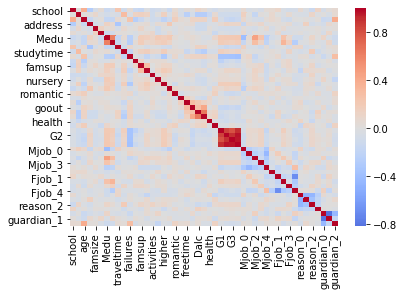

In [57]:
corr = data.corr()
sns.heatmap(corr,cmap = 'coolwarm',center=0)

In [58]:
# correlation 이 큰 G1 ~ G3 없애자.
# 다중공산성 문제 때문. 그리고 이미 G_avg 너무 상관성이 잘 알려져있어서 분석의 의미가 없다.
data= data.drop(['G1','G2','G3'], axis=1)

# 데이터 분석

## Linear regression

falures[재적] 의 수와 성적평균의 관계를 살펴보자

### 데이터 전처리

In [59]:
X = data[["failures"]]
y = data["G_avg"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

### 모델 세우기

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 모델 평가

In [61]:
from sklearn import metrics

predicted = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test,predicted))
print("R squared :", metrics.r2_score(y_test,predicted))

MSE : 0.7100115449103704
R squared : 0.1481314340684191


### 시각화

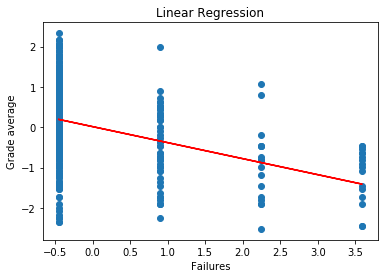

In [63]:
plt.scatter(X, y)
plt.title("Linear Regression")
plt.xlabel("Failures")
plt.ylabel("Grade average")
plt.plot(X, model.predict(X), color="r") ; 

## Polynomial regression

x 가 1개뿐이라, 데이터 분석시 부정확 할 수 있다. 그래서 polynomial 로 변수의 갯수를 늘려서 예측도를 높혀보자

### 데이터 전처리

다항회귀는, 데이터를 돌리기 전, x1 x2 -> x1^2 , x1x2, x2^2 처럼 데이터를 바꾸어야 한다.를 해주어야한다.

In [64]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()  
# degree : 몇 차수까진 늘릴지 결정
#        : (default)=2
# interaction_only : only 자기 자신의 거듭제곱만 넣을지 말지. (ex x1 x2 -> x1^2 , ^2)
#                  : (default)=False (interaction 항 넣기) (EX x1 x2 -> x1^2 , x1x2, x2^2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

### 모델 세우기

In [65]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [67]:
from sklearn import metrics

y_pred = model.predict(X_test_poly)
print ("MSE :", metrics.mean_squared_error(y_test,y_pred))
print("R squared :", metrics.r2_score(y_test,y_pred))

MSE : 0.7032745816072484
R squared : 0.15621441146351023


## Multilinear regression

이 경우는 모든 변수들을 고려해서 G_avg 를 고려해보자.

### 데이터 전처리

In [68]:
X= data.drop(["G_avg"], axis=1)
y= data["G_avg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30)

### 모델 세우기

In [69]:
multilinear = LinearRegression()
multilinear.fit(X_train, y_train)

LinearRegression()

### 모델 평가

In [70]:
predicted = multilinear.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, predicted))
print("R squared :", metrics.r2_score(y_test, predicted))

MSE : 0.86001535917541
R squared : -0.03184244812860548


오히려 더 안좋다. 과적합이 일어나서 그럼. 

## Ridge regression

### 데이터 전처리

In [71]:
X= data.drop(["G_avg"], axis=1)
y= data["G_avg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30)

### 모델 세우기

In [73]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

para_range = np.logspace(-3, 3, num=50) # 10^-3 ~ 10^3 
model = RidgeCV(alphas = para_range , cv=5)
# cross validaaion 을 5 fold cross validation 으로 지정 , 
# para_range 의 범위만큼 ,cv 를 해서 최적의 alpha 를 구하겠다는 의미
# RidgeCV = cv 와 ridge 를 동시에 합친 model 이다.
model.fit(X_train, y_train) ;
# X_train, Y_train 으로 ridgecv 를 fitting 해야 비로소 의미가 생긴다. 위는 setting 작업임.
#ridgecv.fit 은 alpha 를 위에서 구한 최적의 값을 써서 ridge regression 을 하겠다는 의미이다.

### 모델 평가

In [75]:
from sklearn import metrics

predicted = model.predict(X_test) 
# 우리가 fitting 한 coefficient 로 X_test 를 이용해 Y_test 를 predict
#ridgecv.alpha_ # Estimated regularization parametor (최적값)
#ridgecv.coef_ # fitting 한 coff 값들

print ("MSE :", metrics.mean_squared_error(y_test, predicted))
print('R_squared :',model.score(X_test, y_test)) # C-V 로 찾은 최적의 ridge 로 계산한 R^2

MSE : 0.7032498263381964
R_squared : 0.15624411272076122


## lasso regression

### 데이터 전처리

In [260]:
X= data.drop(["G_avg"], axis=1)
y= data["G_avg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30)

### 모델 세우기

In [261]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

alphas = np.logspace(-3, 3, num=50) # 10^-3 ~ 10^3 
lassocv = LassoCV(alphas = alphas, cv=5)
# 위 ridge 때와 동일
lassocv.fit(X_train, y_train) ;

### 모델 평가

In [262]:
predicted = lassocv.predict(X_test) 
# 우리가 fitting 한 coefficient 로 X_test 를 이용해 Y_test 를 predict
#lassocv.alpha_ # Estimated regularization parametor (최적값)
#lassocv.coef_ # fitting 한 coff 값들

print ("MSE :", metrics.mean_squared_error(y_test, predicted))
print('R_squared :',lassocv.score(X_test, y_test)) # C-V 로 찾은 최적의 ridge 로 계산한 R^2

MSE : 0.7339247000259099
R_squared : 0.11944054122139425


### Feature Importance

# 상위 10개의 계수들을 보여준다.

Text(0.5, 1.0, 'Coefficients in the Model')

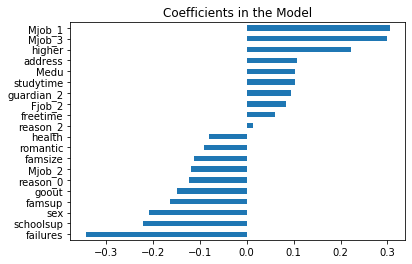

In [263]:
coef = pd.Series(lassocv.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

# summary

## Multi, Ridge, Lasso 모두 시각화해보기

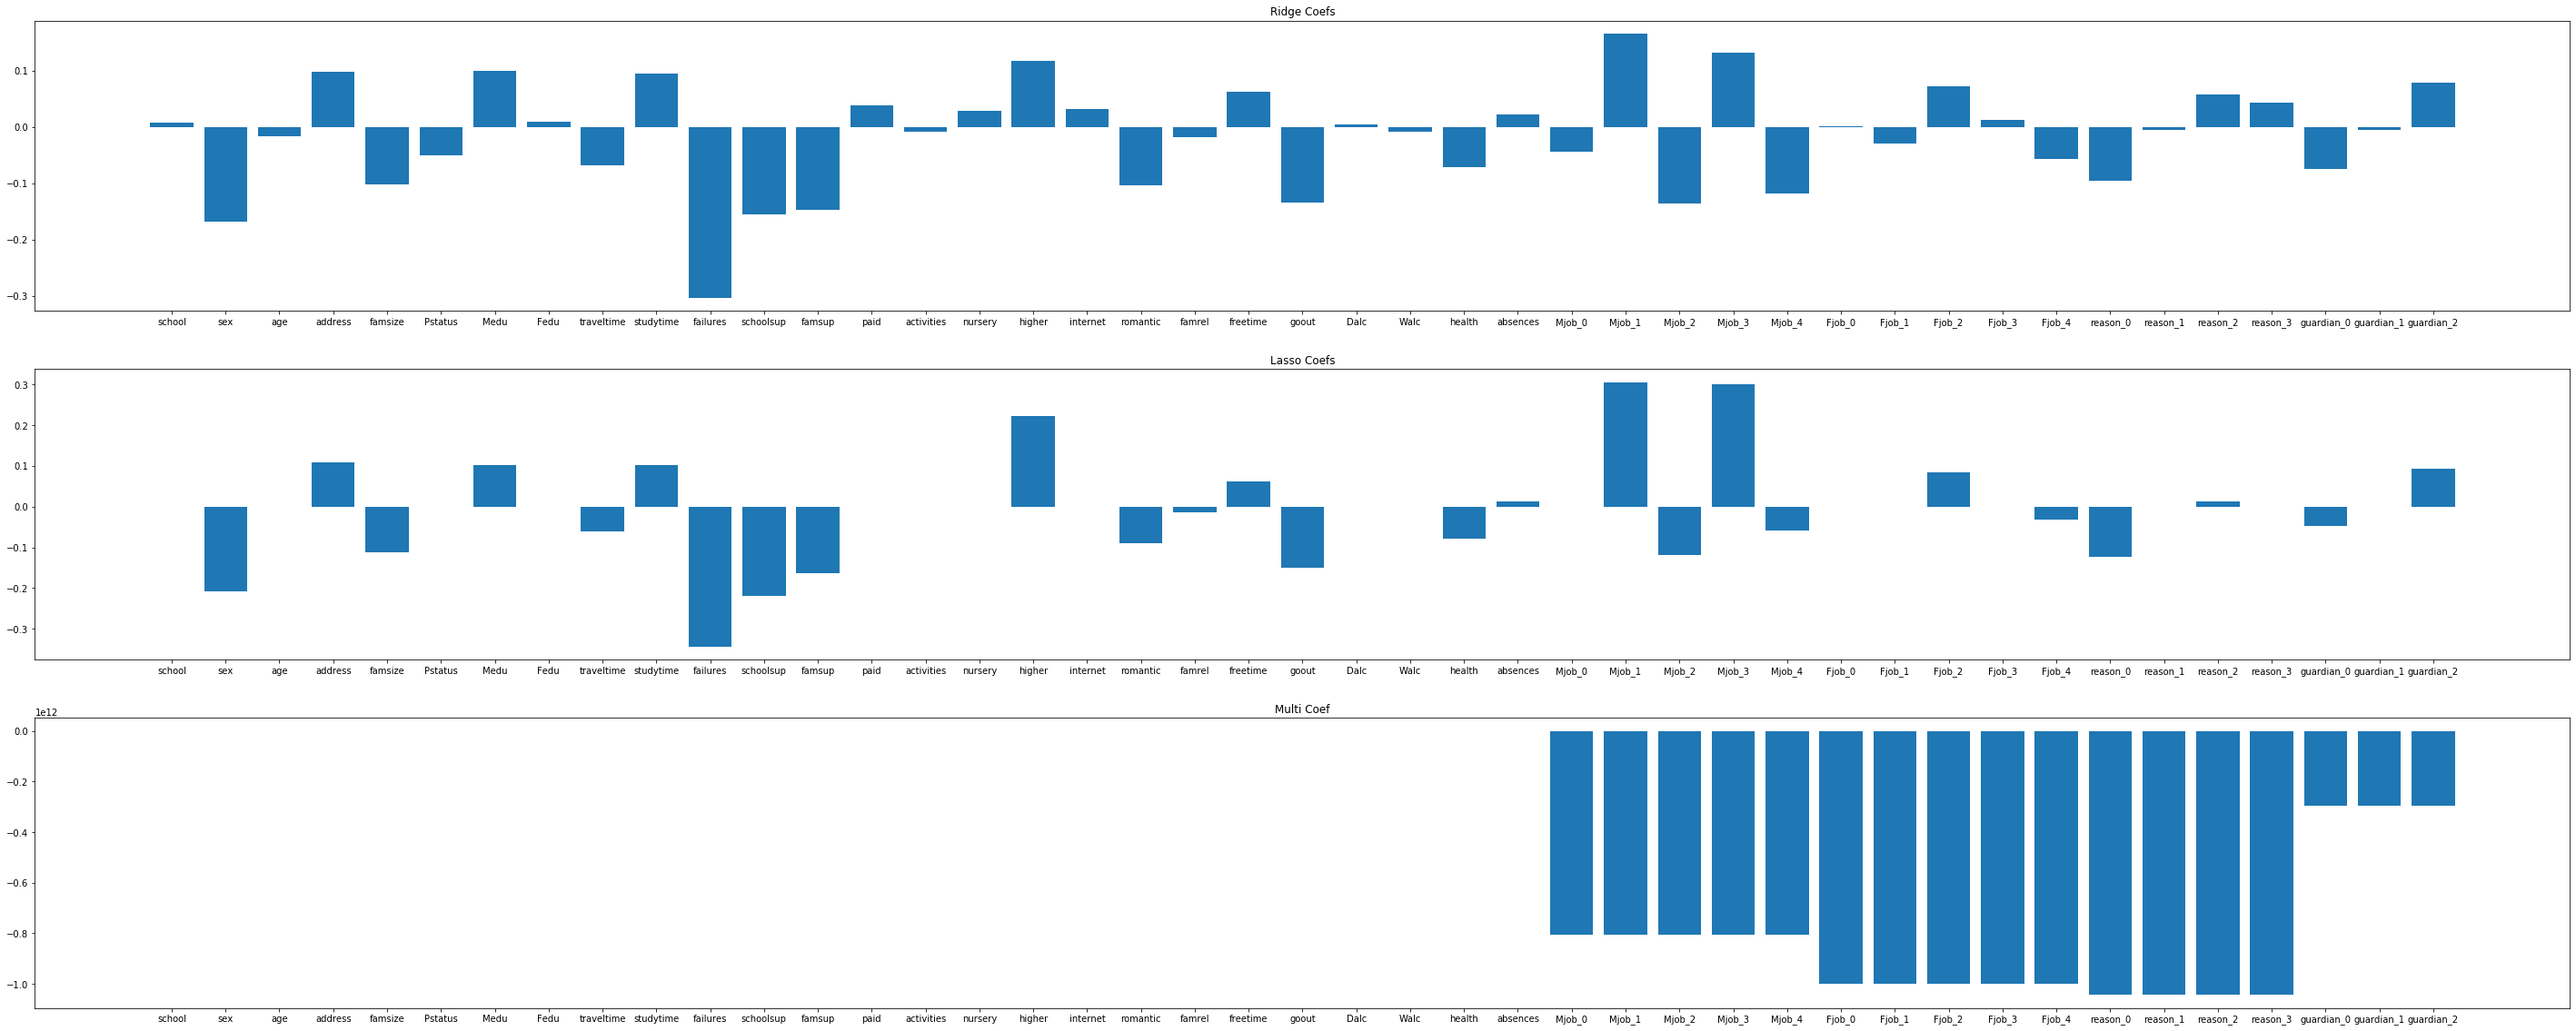

In [264]:
labels = list(X_train.columns)
index = np.arange(len(labels))
titles = ['Ridge Coefs', 'Lasso Coefs','Multi Coef']
coefs = [ridgecv.coef_, lassocv.coef_,multilinear.coef_]

fig, axes = plt.subplots(3,1,figsize=(50, 20))
for idx, ax in enumerate(axes):  # axes 는 현재 1,2 두가지이다. ## enumerate는 “열거하다”라는 뜻이다. 이 함수는 순서가 있는 자료형(리스트, 튜플, 문자열)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴한다.
    ax.bar(index, coefs[idx]) 
    ax.set_xticks(index)         # x index 를 몇개나 표시할지. 이경우 다 표시하고 싶었다.
    ax.set_xticklabels(labels) # x 의 index 에 붙일 label
    ax.set_title(titles[idx])    # 각 그래프에 제목 붙이기.  

# summary